In [1]:
# Funktion der kan bruges til at installere manglende packages
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Installér fasttext
install('fasttext')

In [2]:
import fasttext
#import nltk
#import nltk.corpus
#import os
#import pickle
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [197]:
# Træn modellen ud fra givne parameter
model = fasttext.train_supervised(input="test.train", epoch=50, lr=0.5, wordNgrams=2, bucket=200000, dim=100, loss='ova')

In [195]:
# Funktion til at formattere testresultatet af modellen for pænere visning
def print_result(N, p, r):
    print('Samples\t\t' + str(N))
    print('Precision\t{:.3f}'.format(p))
    print('Recall\t\t{:.3f}\n'.format(r))

print('-- Training')
print_result(*model.test('test.train'))

print('-- Validation')
print_result(*model.test('test.valid'))

-- Training
Samples		4998
Precision	1.000
Recall		1.000

-- Validation
Samples		2229
Precision	0.820
Recall		0.820



In [203]:
epoch = 5

models_train = []
models_valid = []
model_valid_epoch = 0
model_valid_peak = 0.0

with tqdm(total=epoch) as progress:
    print('        ', 'Training', '     | ', 'Validation')
    print('        ', 'Prec.', 'Recall  | ', 'Prec.', 'Recall')
    
    for i in range(epoch):
        progress.update(1)

        model = fasttext.train_supervised(input="test.train", epoch=i)
        models_train.append(model.test('test.train'))
        models_valid.append(model.test('test.valid'))
        
        if (models_valid[i][1] > model_valid_peak):
            model_valid_peak = models_valid[i][1]
            model_valid_epoch = i+1
            precision = '\033[92mHigher\033[0m'
        else:
            precision = '\033[91mLower\033[0m'
        
        print('{0:2}'.format(i+1), ' ==> ', '{:.3f}'.format(models_train[i][1]), ' {:.3f}'.format(models_train[i][2]),
              ' |', ' {:.3f}'.format(models_valid[i][1]), ' {:.3f}'.format(models_valid[i][2]), ' ==> ', precision)

    print('\n    -->  Epoch peaked at', '\033[1m' + '\033[94m' + str(model_valid_epoch))

         Training      |  Validation
         Prec. Recall  |  Prec. Recall
 1  ==>  0.030  0.030  |  0.030  0.030  ==>  Higher
 2  ==>  0.541  0.541  |  0.559  0.559  ==>  Higher
 3  ==>  0.785  0.785  |  0.751  0.751  ==>  Higher
 4  ==>  0.808  0.808  |  0.775  0.775  ==>  Higher
 5  ==>  0.823  0.823  |  0.787  0.787  ==>  Higher

    -->  Epoch peaked at 5



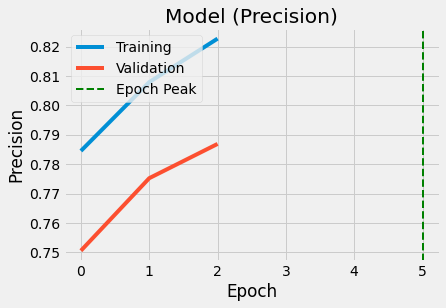

In [208]:
# Visualisér modellens præcision
threshold = 0.6

plt.plot([pr[1] for pr in models_train if pr[1] > threshold], label='Training')
plt.plot([pr[1] for pr in models_valid if pr[1] > threshold], label='Validation')
plt.axvline(model_valid_epoch, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

plt.title('Model (Precision)')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

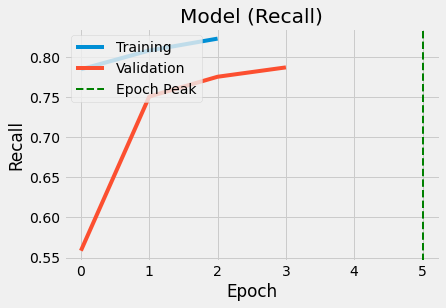

In [215]:
# Visualisér modellens recall
threshold = 0.55

plt.plot([pr[2] for pr in models_train if pr[2] > threshold], label='Training')
plt.plot([pr[2] for pr in models_valid if pr[2] > threshold], label='Validation')
plt.axvline(model_valid_epoch, linewidth=2, color='g', linestyle='--', label=('Epoch Peak'))

plt.title('Model (Recall)')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()